<a href="https://colab.research.google.com/github/pushpalatha2297/hds5210-2023/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**HDS FINAL PROJECT-5210-02**

#Introduction:

The globe has come together to fight a worldwide health emergency in response to the COVID-19 epidemic. The new coronavirus that produced COVID-19 has affected every part of our existence. It has tested our healthcare systems and forced us to reassess our dietary habits, immunization schedules, and way of life.

Using three essential datasets, this study thoroughly investigates the COVID-19 epidemic. COVID-19 statistics, Data on healthy diets during the pandemic, and a complete summary of worldwide Vaccination campaigns. Our goal is to interpret the pandemic's patterns, determine how food decisions affect health at these times, and present a comprehensive picture of vaccine coverage worldwide through data analysis and visualization.

1. The first dataset, **"COVID-19"** was sourced in Excel format from Kaggle. This dataset offers a comprehensive snapshot of the pandemic's impact across countries. It includes essential metrics such as confirmed cases, deaths, recoveries etc. With this dataset, we gain valuable insights into the spread of the virus, its severity, and the ongoing response efforts.


---


2. The second dataset, **"COVID-19 Healthy Diet"** was obtained from Kaggle in CSV format which focuses on dietary habits and their correlation with health during the COVID-19 pandemic. This dataset enables us to examine the impact of diet on health outcomes in the context of the ongoing pandemic.


---


3. The third dataset, **"Covid-19 Vaccine Data"** was sourced from Kaggle in CSV format, this is a valuable resource for tracking and analyzing COVID-19 vaccination efforts across regions. It provides comprehensive vaccination data, offering insights into the progress of vaccination campaigns, coverage rates, and distribution strategies.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#**1. "Global COVID-19 Impact: A Comprehensive Overview of Pandemic Statistics"**

The provided COVID-19 dataset offers a concise yet comprehensive snapshot of the pandemic's global impact. It includes key metrics like confirmed cases, deaths, recoveries, active cases, and daily updates. The dataset provides insights through ratios such as deaths per 100 cases and recovery rates. It tracks weekly trends in case numbers, reflecting the dynamic nature of the pandemic across different WHO regions. This data is crucial for understanding COVID-19's global spread and impact.








In [2]:
#loading first dataset in Excel format from local source
df = pd.read_excel('Covid 19.xlsx')
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


#**"Optimizing Data for Analysis: Data Cleaning and Transformation"**:

In [3]:
#checking the shape of the dataset which contains Number of Rows and Columns
df.shape

(187, 15)

In [4]:
#Dropping Unecassary columns
df.drop(columns=['1 week % increase', 'WHO Region', 'Confirmed last week', '1 week change'], inplace=True)

In [5]:
#Renaming Columns
df.rename(columns={
    'Deaths / 100 Cases': 'Mortality Rate (%)',
    'Country/Region': 'Country',
    'Recovered / 100 Cases': 'Recovery Rate (%)',
    'Deaths / 100 Recovered': 'Death Rate Among Recovered (%)'
}, inplace=True)

In [6]:
#Creating a new calculated field named Active Percentage
df['Case Fatality Rate'] = (df['Deaths'] / df['Confirmed']) * 100
df.head()

,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Mortality Rate (%),Recovery Rate (%),Death Rate Among Recovered (%),Case Fatality Rate
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,3.499435
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,2.950820
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,4.157581
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,5.733186
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,4.315789


In [7]:
#Replacing NaN values with '0'
df.fillna(0, inplace=True)

In [8]:
#Checking the Datatypes of all the Variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         187 non-null    object 
 1   Confirmed                       187 non-null    int64  
 2   Deaths                          187 non-null    int64  
 3   Recovered                       187 non-null    int64  
 4   Active                          187 non-null    int64  
 5   New cases                       187 non-null    int64  
 6   New deaths                      187 non-null    int64  
 7   New recovered                   187 non-null    int64  
 8   Mortality Rate (%)              187 non-null    float64
 9   Recovery Rate (%)               187 non-null    float64
 10  Death Rate Among Recovered (%)  187 non-null    float64
 11  Case Fatality Rate              187 non-null    float64
dtypes: float64(4), int64(7), object(1)
m

#**First Visualization:**

<Figure size 1200x600 with 0 Axes>

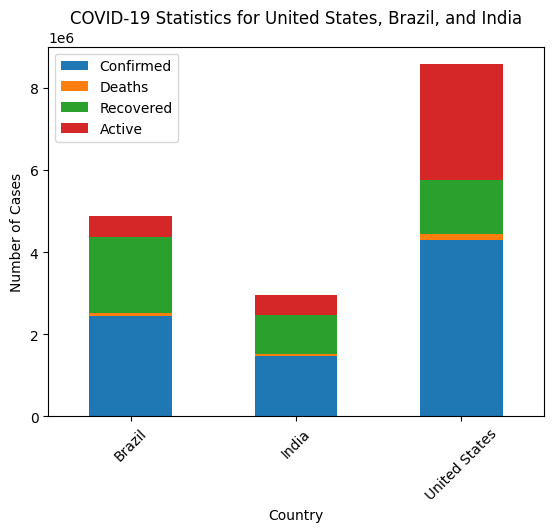

In [9]:
# Filters the main dataframe for rows where the 'Country' column matches one of the countries of interest.
countries_of_interest = ['United States', 'Brazil', 'India']
df_filtered = df[df['Country'].isin(countries_of_interest)]

# Beginning a new figure for plotting and set the size of the figure.
plt.figure(figsize=(12, 6))
# Plotting a stacked bar chart for the filtered dataframe, setting the index to 'Country' and including relevant columns.
df_filtered.set_index('Country')[['Confirmed', 'Deaths', 'Recovered', 'Active']].plot(kind='bar', stacked=True)
# Setting the title of the bar chart.
plt.title('COVID-19 Statistics for United States, Brazil, and India')
# Setting the label for the y-axis.
plt.ylabel('Number of Cases')
# Setting the label for the x-axis.
plt.xlabel('Country')
# Rotates the x-axis labels to 45 degrees for better visibility.
plt.xticks(rotation=45)
# Displays the plot.
plt.show()


**Interpretation:** This bar chart represents a comparative analysis of COVID-19 impact in the United States, Brazil, and India, the three countries with the highest confirmed cases at the time of the data. The United States exhibits the most substantial total, with active cases forming the majority, indicating an ongoing challenge in containment and treatment. Brazil and India have a closer tally in confirmed cases, yet Brazil shows a higher death rate. Recovered cases in India are proportionally significant, suggesting effective recovery protocols. The chart underscores the diverse pandemic responses and outcomes across these countries.

#**2. "Nutrition and Pandemic Patterns: A Global COVID-19 Diet Correlation Study"**

The COVID-19 Healthy Diet Dataset provides information on the connection between diet, health, and the pandemic's consequences by combining nutritional profiles and COVID-19 prevalence measurements from different nations. It compiles food consumption statistics, obesity, and undernourishment rates, along with COVID-19 cases, recoveries, and mortality, to identify potential dietary patterns that may correlate with the virus's impact on populations.








In [10]:
# Loading the Second Dataset in CSV format from a local source
df2 = pd.read_csv("Covid 19 Healthy diet data.csv")
df2.head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0,21.6397,6.2224,0.0,8.0353,0.6859,0.0327,0.4246,6.1244,...,17.0831,0.3593,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,0.0,32.0002,3.4172,0.0,2.6734,1.6448,0.1445,0.6418,8.7428,...,9.2443,0.6503,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.0,14.4175,0.8972,0.0,4.2035,1.2171,0.2008,0.5772,3.8961,...,27.3606,0.5145,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,0.0,15.3041,1.3130,0.0,6.5545,0.1539,1.4155,0.3488,11.0268,...,22.4638,0.1231,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,0.0,27.7033,4.6686,0.0,3.2153,0.3872,1.5263,1.2177,14.3202,...,14.4436,0.2469,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%


#**"Optimizing Data for Analysis: Data Cleaning and Transformation"**:

In [11]:
# Selecting specific columns from the second dataset
selected_columns = ['Country', 'Animal Products', 'Cereals - Excluding Beer', 'Eggs', 'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat', 'Milk - Excluding Butter', 'Pulses', 'Spices', 'Treenuts', 'Vegetable Oils', 'Vegetables', 'Obesity', 'Population']
df2_selected = df2[selected_columns]

In [12]:
# Check for NaN values in each column of df2_selected
nan_columns = df2_selected.columns[df2_selected.isna().any()]

# Print the columns with NaN values
print(nan_columns)


Index(['Obesity'], dtype='object')


In [13]:
# Creating a copy of the dataframe 'df2_selected' to avoid modifying the original data.
df2_selected_copy = df2_selected.copy()
# Replace missing values in the 'Obesity' column with 0, modifying the dataframe in place.
df2_selected_copy['Obesity'].fillna(0, inplace=True)

In [14]:
# Checking for NaN values in each column of df2_selected_copy
nan_columns = df2_selected_copy.columns[df2_selected_copy.isna().any()]

# Print the columns with NaN values
print(nan_columns)


Index([], dtype='object')


In [15]:
#Checking the Datatypes of all the Variables
df2_selected_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   170 non-null    object 
 1   Animal Products           170 non-null    float64
 2   Cereals - Excluding Beer  170 non-null    float64
 3   Eggs                      170 non-null    float64
 4   Fish, Seafood             170 non-null    float64
 5   Fruits - Excluding Wine   170 non-null    float64
 6   Meat                      170 non-null    float64
 7   Milk - Excluding Butter   170 non-null    float64
 8   Pulses                    170 non-null    float64
 9   Spices                    170 non-null    float64
 10  Treenuts                  170 non-null    float64
 11  Vegetable Oils            170 non-null    float64
 12  Vegetables                170 non-null    float64
 13  Obesity                   170 non-null    float64
 14  Population

In [16]:
#checking the shape of the dataset which contains Number of Rows and Columns
df2_selected_copy.shape

(170, 15)

#**Merging 1st and 2nd Datasets**

#"Analyzing the Interplay: COVID-19 Impacts in the Context of Nutritional Data"

Merging the COVID-19 health data with dietary information allows for a multifaceted analysis of the pandemic's effects in relation to nutrition. The combined dataset could help uncover whether dietary preferences, such as high meat consumption or vegetable intake, correlate with COVID-19 outcomes. For instance, countries with higher obesity rates, potentially indicative of certain dietary patterns, may exhibit different recovery or mortality rates. The integration of these datasets aims to provide deeper insights into how lifestyle factors may affect disease progression and recovery in populations.

In [17]:
# Merge the original dataframe 'df' with the modified 'df2_selected_copy' dataframe.
# The merge is done on the 'Country' column, using an 'outer' join method to include all records from both dataframes.
merged_df = pd.merge(df, df2_selected_copy, on='Country', how='outer')
# Displays the first few rows of the merged dataframe to verify the merge was successful.
merged_df.head()


,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Mortality Rate (%),Recovery Rate (%),...,Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Pulses,Spices,Treenuts,Vegetable Oils,Vegetables,Obesity,Population
0,Afghanistan,36263.0,1269.0,25198.0,9796.0,106.0,10.0,18.0,3.50,69.49,...,0.4246,6.1244,8.2803,0.1960,0.2776,0.7513,17.0831,0.3593,4.5,38928000.0
1,Albania,4880.0,144.0,2745.0,1991.0,117.0,6.0,63.0,2.95,56.25,...,0.6418,8.7428,17.7576,0.1148,0.0000,0.9181,9.2443,0.6503,22.3,2838000.0
2,Algeria,27973.0,1163.0,18837.0,7973.0,616.0,8.0,749.0,4.16,67.34,...,0.5772,3.8961,8.0934,0.2698,0.1568,0.8595,27.3606,0.5145,26.6,44357000.0
3,Andorra,907.0,52.0,803.0,52.0,10.0,0.0,0.0,5.73,88.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,950.0,41.0,242.0,667.0,18.0,1.0,0.0,4.32,25.47,...,0.3488,11.0268,1.2309,0.3282,0.0103,0.0308,22.4638,0.1231,6.8,32522000.0


#**"Optimizing Data for Analysis: Data Cleaning and Transformation"**:

In [18]:
# Replacing NaN values with the mean of each column
# Excluding 'Country' column from mean calculation
merged_df.fillna(merged_df.select_dtypes(include=[np.number]).mean(), inplace=True)

# Displaying the modified DataFrame
merged_df.head()

,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Mortality Rate (%),Recovery Rate (%),...,Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Pulses,Spices,Treenuts,Vegetable Oils,Vegetables,Obesity,Population
0,Afghanistan,36263.0,1269.0,25198.0,9796.0,106.0,10.0,18.0,3.50,69.49,...,0.424600,6.124400,8.280300,0.196000,0.277600,0.751300,17.083100,0.359300,4.500000,3.892800e+07
1,Albania,4880.0,144.0,2745.0,1991.0,117.0,6.0,63.0,2.95,56.25,...,0.641800,8.742800,17.757600,0.114800,0.000000,0.918100,9.244300,0.650300,22.300000,2.838000e+06
2,Algeria,27973.0,1163.0,18837.0,7973.0,616.0,8.0,749.0,4.16,67.34,...,0.577200,3.896100,8.093400,0.269800,0.156800,0.859500,27.360600,0.514500,26.600000,4.435700e+07
3,Andorra,907.0,52.0,803.0,52.0,10.0,0.0,0.0,5.73,88.53,...,0.542117,9.494279,5.109061,0.261032,0.281251,0.698955,18.571657,0.309512,18.377647,4.452364e+07
4,Angola,950.0,41.0,242.0,667.0,18.0,1.0,0.0,4.32,25.47,...,0.348800,11.026800,1.230900,0.328200,0.010300,0.030800,22.463800,0.123100,6.800000,3.252200e+07


In [19]:
# Sorting the merged DataFrame in descending order by the 'Confirmed' cases column.
df_sorted = merged_df.sort_values(by='Confirmed', ascending=False)

# Resetting the index to get a new sequential index starting from 1
df_sorted.reset_index(drop=True, inplace=True)

# Displays the top 5 rows of the DataFrame to examine the countries with the most confirmed cases.
df_sorted.head()


,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Mortality Rate (%),Recovery Rate (%),...,Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Pulses,Spices,Treenuts,Vegetable Oils,Vegetables,Obesity,Population
0,United States,4290259.0,148011.0,1325804.0,2816444.0,56336.0,1076.0,27941.0,3.45,30.90,...,0.542117,9.494279,5.109061,0.261032,0.281251,0.698955,18.571657,0.309512,18.377647,4.452364e+07
1,Brazil,2442375.0,87618.0,1846641.0,508116.0,23284.0,614.0,33728.0,3.59,75.61,...,0.252800,14.292000,5.165400,0.252800,0.008000,0.176600,21.215300,0.120400,22.300000,2.118120e+08
2,India,1480073.0,33408.0,951166.0,495499.0,44457.0,637.0,33598.0,2.26,64.26,...,0.404600,0.906100,6.491900,1.108400,0.800500,0.501400,21.780400,0.395800,3.800000,1.400100e+09
3,Russia,816680.0,13334.0,602249.0,201097.0,5607.0,85.0,3077.0,1.63,73.74,...,0.213800,10.843300,6.845300,0.054600,0.027300,0.127400,18.375300,0.263800,25.700000,1.467330e+08
4,South Africa,452529.0,7067.0,274925.0,170537.0,7096.0,298.0,9848.0,1.56,60.75,...,0.085400,14.148900,3.105600,0.042700,0.103700,0.091500,21.787700,0.164700,27.000000,5.962800e+07


In [20]:
# Selecting the top three countries based on confirmed cases
top_countries = df_sorted.nlargest(3, 'Confirmed')

# Creating a pivot table
pivot_table = top_countries.pivot_table(
    index='Country',
    values=['Confirmed', 'Deaths', 'Recovered', 'Mortality Rate (%)', 'Recovery Rate (%)',
            'Meat', 'Fruits - Excluding Wine', 'Milk - Excluding Butter', 'Obesity'],
    aggfunc={'Confirmed': 'sum',
             'Deaths': 'sum',
             'Recovered': 'sum',
             'Mortality Rate (%)': 'mean',
             'Recovery Rate (%)': 'mean',
             'Meat': 'mean',
             'Fruits - Excluding Wine': 'mean',
             'Milk - Excluding Butter': 'mean',
             'Obesity': 'mean'}
)

pivot_table

,Confirmed,Deaths,Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Mortality Rate (%),Obesity,Recovered,Recovery Rate (%)
Country,,,,,,,,,
Brazil,2442375.0,87618.0,0.252800,14.292000,5.165400,3.59,22.300000,1846641.0,75.61
India,1480073.0,33408.0,0.404600,0.906100,6.491900,2.26,3.800000,951166.0,64.26
United States,4290259.0,148011.0,0.542117,9.494279,5.109061,3.45,18.377647,1325804.0,30.90


This pivot table analyzes how dietary factors may intersect with COVID-19 outcomes in Brazil, India, and the United States. It reveals that while the U.S. has the highest number of confirmed cases, its recovery rate is significantly lower than Brazil's, with notably higher meat consumption and a superior recovery rate. This suggests a potential correlation between protein-rich diets and better COVID-19 recovery. Meanwhile, India has the highest milk consumption and has a moderate recovery rate. The table also highlights the role of obesity in mortality rates, with countries having higher obesity rates experiencing more significant mortality. This concise yet comprehensive data presentation underscores the potential influence of dietary habits on pandemic resilience, offering valuable insights for public health strategies.

#**Second Visualization:**

<Figure size 1200x600 with 0 Axes>

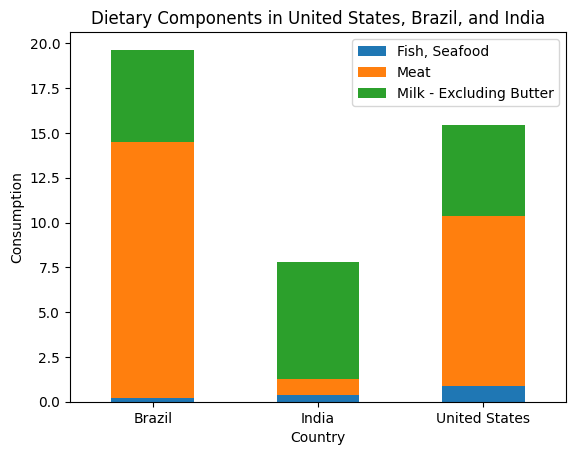

In [21]:
# Filtering the DataFrame to include only data for the United States, Brazil, and India.
countries_of_interest = ['United States', 'Brazil', 'India']
df_filtered_specific = merged_df[merged_df['Country'].isin(countries_of_interest)]

# Initializing the figure for plotting with a specified figure size.
plt.figure(figsize=(12, 6))
# Creating a stacked bar plot for dietary components like Fish, Seafood, and Meat, specifying the data source and plot type.
df_filtered_specific.set_index('Country')[['Fish, Seafood', 'Meat', 'Milk - Excluding Butter']].plot(kind='bar', stacked=True)
# Setting the title of the plot.
plt.title('Dietary Components in United States, Brazil, and India')
# Labeling the Y-axis as 'Consumption'.
plt.ylabel('Consumption')
# Labeling the X-axis as 'Country'.
plt.xlabel('Country')
# Setting the X-ticks rotation to 0 for better label readability.
plt.xticks(rotation=0)
# Displaying the plot.
plt.show()



**Interpretation:**
The chart provides a detailed comparison of dietary habits in Brazil, India, and the United States, focusing on the consumption of fish and seafood, meat, and milk. Brazil's high meat intake surpasses that of milk, with the lowest consumption of fish and seafood. India prioritizes dairy, consuming milk far more than meat or seafood, reflecting dietary preferences potentially influenced by cultural practices. The United States maintains a higher and almost equal consumption of both meat and milk, with fish and seafood being the least consumed, indicative of a diet rich in protein and dairy.

In [22]:
#Checking the Datatypes of all the Variables
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         200 non-null    object 
 1   Confirmed                       200 non-null    float64
 2   Deaths                          200 non-null    float64
 3   Recovered                       200 non-null    float64
 4   Active                          200 non-null    float64
 5   New cases                       200 non-null    float64
 6   New deaths                      200 non-null    float64
 7   New recovered                   200 non-null    float64
 8   Mortality Rate (%)              200 non-null    float64
 9   Recovery Rate (%)               200 non-null    float64
 10  Death Rate Among Recovered (%)  200 non-null    float64
 11  Case Fatality Rate              200 non-null    float64
 12  Animal Products                 200 

#**3. "Assessing Immunization: Insights from the COVID-19 Vaccination Tracker Dataset"**
This COVID-19 vaccination data provides:
*A country-by-country breakdown of vaccination progress.

*Detailing doses administered per 100 people.

*Total doses administered.

*The percentages of populations that are vaccinated and fully vaccinated.

  It highlights the disparity in vaccination rates worldwide, showcasing countries like Argentina, Australia, and Bhutan with high vaccination percentages, in contrast to nations like Burundi with minimal vaccination figures. This dataset is essential for tracking global vaccination efforts and understanding the distribution challenges different countries face.

  The COVID-19 vaccination data, when analyzed alongside the healthy diet dataset, allows for a comprehensive study of how nutritional factors may influence the efficacy of vaccinations and the body's immune response. The combined data could reveal trends indicating that populations with better nutrition have more robust responses to vaccinations, potentially leading to lower infection rates and milder disease courses. This analysis could inform public health policies integrating dietary improvements with vaccination campaigns to enhance population health outcomes during the pandemic.

## Loading data from snowflake
 I utilized the Snowflake connector to extract the third dataset and then employed a Python connector to run the necessary query. This process successfully transferred the data into a Pandas DataFrame for subsequent analysis.

In [23]:
!pip install "snowflake-connector-python[pandas]"

# Get user password
import getpass
pwd = getpass.getpass('Enter password')

Enter password··········


In [24]:
# Import the snowflake.connector library to establish a connection with the Snowflake database.
import snowflake.connector
# Creating a connection object to Snowflake using provided credentials and account details.
conn = snowflake.connector.connect(
    user='pushpalatha',  # Username for Snowflake account
    password=str(pwd),   # Password for Snowflake account, converted to string in case it's not
    account='QIRQICA-ZA87285'  # Account identifier for Snowflake
)


In [25]:
# Create a variable called sql and specify a query that it will store
sql = 'select * from HDS_FINAL.PUBLIC.COVID_19_VACCINATION_DATA  '
#Executed the query using the python connector
res = conn.cursor().execute(sql).fetchall()

In [26]:
#loaded the data from snowflake in CSV format
COVID19_VACCINATION_DATA = pd.read_sql(sql, conn)
COVID19_VACCINATION_DATA

<ipython-input-26-2af29a7c1005>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  COVID19_VACCINATION_DATA = pd.read_sql(sql, conn)


,COUNTRY,DOSES_ADMINISTERED_PER_100_PEOPLE,TOTAL_DOSES_ADMINISTERED,% of population vaccinated,% of population fully vaccinated
0,Afghanistan,33,12526397,30,28
1,Albania,106,3025728,47,44
2,Algeria,35,15267442,18,15
3,Angola,74,23701049,47,26
4,Argentina,252,113272665,92,84
...,...,...,...,...,...
182,Vietnam,275,265336568,94,89
183,West Bank and Gaza,80,3748571,43,38
184,Yemen,4,1242982,4,3
185,Zambia,71,12655676,60,48


In [27]:
# Check for NaN values in each column of COVID19_VACCINATION_DATA
nan_columns = COVID19_VACCINATION_DATA.columns[COVID19_VACCINATION_DATA.isna().any()]

# Print the columns with NaN values
print(nan_columns)


Index([], dtype='object')


In [28]:
#Renaming Columns
COVID19_VACCINATION_DATA.rename(columns={
    'COUNTRY': 'Country'
}, inplace=True)

#**Merging COVID-19 Impacts in the Context of Nutritional Data" and Covid-19 Vaccination Data**

This merged dataset unites COVID-19 impact metrics with nutritional profiles and vaccination data across countries, serving as a multidimensional tool for analyzing the pandemic's trajectory against health and dietary backdrops. It is designed to discern patterns and correlations, such as whether certain dietary habits are linked to improved patient outcomes or if vaccination rates align with lower morbidity and mortality. This holistic view aids in crafting targeted public health responses and understanding the comprehensive effects of lifestyle on COVID-19 resilience.

In [29]:
Covid_19_Merged_df = pd.merge(merged_df, COVID19_VACCINATION_DATA, on='Country', how='outer')
Covid_19_Merged_df.head()


,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Mortality Rate (%),Recovery Rate (%),...,Spices,Treenuts,Vegetable Oils,Vegetables,Obesity,Population,DOSES_ADMINISTERED_PER_100_PEOPLE,TOTAL_DOSES_ADMINISTERED,% of population vaccinated,% of population fully vaccinated
0,Afghanistan,36263.0,1269.0,25198.0,9796.0,106.0,10.0,18.0,3.50,69.49,...,0.277600,0.751300,17.083100,0.359300,4.500000,3.892800e+07,33.0,12526397.0,30.0,28.0
1,Albania,4880.0,144.0,2745.0,1991.0,117.0,6.0,63.0,2.95,56.25,...,0.000000,0.918100,9.244300,0.650300,22.300000,2.838000e+06,106.0,3025728.0,47.0,44.0
2,Algeria,27973.0,1163.0,18837.0,7973.0,616.0,8.0,749.0,4.16,67.34,...,0.156800,0.859500,27.360600,0.514500,26.600000,4.435700e+07,35.0,15267442.0,18.0,15.0
3,Andorra,907.0,52.0,803.0,52.0,10.0,0.0,0.0,5.73,88.53,...,0.281251,0.698955,18.571657,0.309512,18.377647,4.452364e+07,NaN,NaN,NaN,NaN
4,Angola,950.0,41.0,242.0,667.0,18.0,1.0,0.0,4.32,25.47,...,0.010300,0.030800,22.463800,0.123100,6.800000,3.252200e+07,74.0,23701049.0,47.0,26.0


In [30]:
# Replacing NaN values with the mean of each column
# Excluding 'Country' column from mean calculation
Covid_19_Merged_df.fillna(Covid_19_Merged_df.select_dtypes(include=[np.number]).mean(), inplace=True)

# Displaying the modified DataFrame
Covid_19_Merged_df.head()

,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Mortality Rate (%),Recovery Rate (%),...,Spices,Treenuts,Vegetable Oils,Vegetables,Obesity,Population,DOSES_ADMINISTERED_PER_100_PEOPLE,TOTAL_DOSES_ADMINISTERED,% of population vaccinated,% of population fully vaccinated
0,Afghanistan,36263.0,1269.0,25198.0,9796.0,106.0,10.0,18.0,3.50,69.49,...,0.277600,0.751300,17.083100,0.359300,4.500000,3.892800e+07,33.000000,1.252640e+07,30.000000,28.000000
1,Albania,4880.0,144.0,2745.0,1991.0,117.0,6.0,63.0,2.95,56.25,...,0.000000,0.918100,9.244300,0.650300,22.300000,2.838000e+06,106.000000,3.025728e+06,47.000000,44.000000
2,Algeria,27973.0,1163.0,18837.0,7973.0,616.0,8.0,749.0,4.16,67.34,...,0.156800,0.859500,27.360600,0.514500,26.600000,4.435700e+07,35.000000,1.526744e+07,18.000000,15.000000
3,Andorra,907.0,52.0,803.0,52.0,10.0,0.0,0.0,5.73,88.53,...,0.281251,0.698955,18.571657,0.309512,18.377647,4.452364e+07,141.930481,7.043970e+07,60.235294,55.016043
4,Angola,950.0,41.0,242.0,667.0,18.0,1.0,0.0,4.32,25.47,...,0.010300,0.030800,22.463800,0.123100,6.800000,3.252200e+07,74.000000,2.370105e+07,47.000000,26.000000


In [31]:
# Sorting the DataFrame by 'Confirmed' cases in descending order
df_sorted_2 = Covid_19_Merged_df.sort_values(by='Confirmed', ascending=False)

# Resetting the index to get a new sequential index starting from 1
df_sorted_2.reset_index(drop=True, inplace=True)

# Selecting top three and bottom three countries
top_countries = df_sorted_2.head(3)
bottom_countries = df_sorted_2.tail(3)

# Concatenating top and bottom countries for comparison
selected_countries = pd.concat([top_countries, bottom_countries])

df_sorted_2.head()

,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Mortality Rate (%),Recovery Rate (%),...,Spices,Treenuts,Vegetable Oils,Vegetables,Obesity,Population,DOSES_ADMINISTERED_PER_100_PEOPLE,TOTAL_DOSES_ADMINISTERED,% of population vaccinated,% of population fully vaccinated
0,United States,4290259.0,148011.0,1325804.0,2816444.0,56336.0,1076.0,27941.0,3.45,30.90,...,0.281251,0.698955,18.571657,0.309512,18.377647,4.452364e+07,191.0,6.329057e+08,80.0,68.0
1,Brazil,2442375.0,87618.0,1846641.0,508116.0,23284.0,614.0,33728.0,3.59,75.61,...,0.008000,0.176600,21.215300,0.120400,22.300000,2.118120e+08,229.0,4.823325e+08,89.0,83.0
2,India,1480073.0,33408.0,951166.0,495499.0,44457.0,637.0,33598.0,2.26,64.26,...,0.800500,0.501400,21.780400,0.395800,3.800000,1.400100e+09,161.0,2.201655e+09,75.0,70.0
3,Russia,816680.0,13334.0,602249.0,201097.0,5607.0,85.0,3077.0,1.63,73.74,...,0.027300,0.127400,18.375300,0.263800,25.700000,1.467330e+08,128.0,1.842262e+08,61.0,55.0
4,South Africa,452529.0,7067.0,274925.0,170537.0,7096.0,298.0,9848.0,1.56,60.75,...,0.103700,0.091500,21.787700,0.164700,27.000000,5.962800e+07,65.0,3.805061e+07,41.0,36.0


# **Third Visualisation:-**

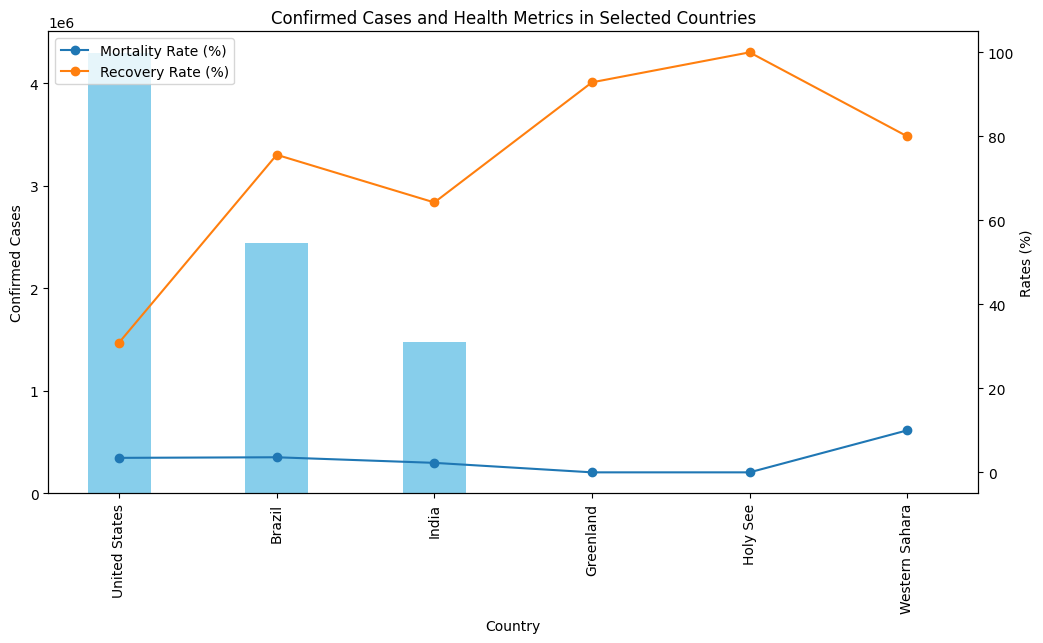

In [32]:
# Initializing a subplot with Matplotlib, setting the figure size for better readability.
fig, ax1 = plt.subplots(figsize=(12, 6))

# Creating a bar plot for confirmed COVID-19 cases and set it to the primary y-axis.
selected_countries.set_index('Country')['Confirmed'].plot(kind='bar', ax=ax1, color='skyblue', width=0.4)
ax1.set_ylabel('Confirmed Cases') # Label the primary y-axis.

# Creating a secondary y-axis for the mortality and recovery rates.
ax2 = ax1.twinx()
# Plots the mortality and recovery rates as lines with markers on the secondary y-axis.
selected_countries.set_index('Country')[['Mortality Rate (%)', 'Recovery Rate (%)']].plot(kind='line', marker='o', ax=ax2)
ax2.set_ylabel('Rates (%)') # Labeling the secondary y-axis.

# Setting the title for the entire figure.
plt.title('Confirmed Cases and Health Metrics in Selected Countries')
# Displays the final visualization.
plt.show()



**Interpretation:** This  graph represents COVID-19 data for select countries, comparing confirmed cases (blue bars) with mortality and recovery rates (lines). The United States, with the tallest bar, has the highest number of confirmed cases. The mortality rate (blue line) remains relatively low across countries, while the recovery rate (orange line) varies more significantly. Notably, the Holy See and Western Sahara show recovery rates approaching or at 100%, which contrasts with the substantial number of cases in larger countries. This suggests different scales of the pandemic's impact and response effectiveness.

#**"Optimizing Data for Analysis: Data Cleaning and Transformation"**:

In [33]:
# Converting the 'TOTAL_DOSES_ADMINISTERED' and 'Population' columns to numeric type
df_sorted_2['TOTAL_DOSES_ADMINISTERED'] = pd.to_numeric(df_sorted_2['TOTAL_DOSES_ADMINISTERED'], errors='coerce')
df_sorted_2['Population'] = pd.to_numeric(df_sorted_2['Population'], errors='coerce')

# Setting display format for floating point numbers
pd.set_option('display.float_format', '{:.1f}'.format)

# Now the DataFrame should display numbers in a readable format while keeping them as floats
df_sorted_2.head()


,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Mortality Rate (%),Recovery Rate (%),...,Spices,Treenuts,Vegetable Oils,Vegetables,Obesity,Population,DOSES_ADMINISTERED_PER_100_PEOPLE,TOTAL_DOSES_ADMINISTERED,% of population vaccinated,% of population fully vaccinated
0,United States,4290259.0,148011.0,1325804.0,2816444.0,56336.0,1076.0,27941.0,3.5,30.9,...,0.3,0.7,18.6,0.3,18.4,44523641.2,191.0,632905664.0,80.0,68.0
1,Brazil,2442375.0,87618.0,1846641.0,508116.0,23284.0,614.0,33728.0,3.6,75.6,...,0.0,0.2,21.2,0.1,22.3,211812000.0,229.0,482332527.0,89.0,83.0
2,India,1480073.0,33408.0,951166.0,495499.0,44457.0,637.0,33598.0,2.3,64.3,...,0.8,0.5,21.8,0.4,3.8,1400100000.0,161.0,2201655453.0,75.0,70.0
3,Russia,816680.0,13334.0,602249.0,201097.0,5607.0,85.0,3077.0,1.6,73.7,...,0.0,0.1,18.4,0.3,25.7,146733000.0,128.0,184226161.0,61.0,55.0
4,South Africa,452529.0,7067.0,274925.0,170537.0,7096.0,298.0,9848.0,1.6,60.8,...,0.1,0.1,21.8,0.2,27.0,59628000.0,65.0,38050611.0,41.0,36.0


In [34]:
#Checking the Datatypes of all the Variables
df_sorted_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            208 non-null    object 
 1   Confirmed                          208 non-null    float64
 2   Deaths                             208 non-null    float64
 3   Recovered                          208 non-null    float64
 4   Active                             208 non-null    float64
 5   New cases                          208 non-null    float64
 6   New deaths                         208 non-null    float64
 7   New recovered                      208 non-null    float64
 8   Mortality Rate (%)                 208 non-null    float64
 9   Recovery Rate (%)                  208 non-null    float64
 10  Death Rate Among Recovered (%)     208 non-null    float64
 11  Case Fatality Rate                 208 non-null    float64

In [35]:
#Creating a new calculated field named Vaccination vs Total Population (%)
#"Vaccination vs Total Population": Assuming we have the total population data,
#this could be calculated as (Total Doses Administered / Total Population) * 100. It would show the percentage of the population that has received at least one vaccine dose.
df_sorted_2['Vaccination vs Population (%)'] = (df_sorted_2['TOTAL_DOSES_ADMINISTERED'] / df_sorted_2['Population']) * 100
df_sorted_2.head()

,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Mortality Rate (%),Recovery Rate (%),...,Treenuts,Vegetable Oils,Vegetables,Obesity,Population,DOSES_ADMINISTERED_PER_100_PEOPLE,TOTAL_DOSES_ADMINISTERED,% of population vaccinated,% of population fully vaccinated,Vaccination vs Population (%)
0,United States,4290259.0,148011.0,1325804.0,2816444.0,56336.0,1076.0,27941.0,3.5,30.9,...,0.7,18.6,0.3,18.4,44523641.2,191.0,632905664.0,80.0,68.0,1421.5
1,Brazil,2442375.0,87618.0,1846641.0,508116.0,23284.0,614.0,33728.0,3.6,75.6,...,0.2,21.2,0.1,22.3,211812000.0,229.0,482332527.0,89.0,83.0,227.7
2,India,1480073.0,33408.0,951166.0,495499.0,44457.0,637.0,33598.0,2.3,64.3,...,0.5,21.8,0.4,3.8,1400100000.0,161.0,2201655453.0,75.0,70.0,157.2
3,Russia,816680.0,13334.0,602249.0,201097.0,5607.0,85.0,3077.0,1.6,73.7,...,0.1,18.4,0.3,25.7,146733000.0,128.0,184226161.0,61.0,55.0,125.6
4,South Africa,452529.0,7067.0,274925.0,170537.0,7096.0,298.0,9848.0,1.6,60.8,...,0.1,21.8,0.2,27.0,59628000.0,65.0,38050611.0,41.0,36.0,63.8


In [36]:
# Filtering the DataFrame to include only the top three and bottom three countries
filtered_df = df_sorted_2[df_sorted_2['Country'].isin(['United States', 'Brazil', 'India', 'Western Sahara', 'Holy See', 'Greenland'])]

# Creating the pivot table
pivot_table = filtered_df.pivot_table(
    index='Country',
    values=['Confirmed', 'Deaths', 'Recovered', 'Active', 'Mortality Rate (%)', 'Recovery Rate (%)', 'Obesity', 'TOTAL_DOSES_ADMINISTERED', '% of population vaccinated'],
    aggfunc={'Confirmed': 'mean', 'Deaths': 'mean', 'Recovered': 'mean', 'Active': 'mean', 'Mortality Rate (%)': 'mean', 'Recovery Rate (%)': 'mean', 'Obesity': 'mean', 'TOTAL_DOSES_ADMINISTERED': 'sum', '% of population vaccinated': 'mean'}
)

pivot_table.head(6)


,% of population vaccinated,Active,Confirmed,Deaths,Mortality Rate (%),Obesity,Recovered,Recovery Rate (%),TOTAL_DOSES_ADMINISTERED
Country,,,,,,,,,
Brazil,89.0,508116.0,2442375.0,87618.0,3.6,22.3,1846641.0,75.6,482332527.0
Greenland,60.2,1.0,14.0,0.0,0.0,18.4,13.0,92.9,70439699.6
Holy See,60.2,0.0,12.0,0.0,0.0,18.4,12.0,100.0,70439699.6
India,75.0,495499.0,1480073.0,33408.0,2.3,3.8,951166.0,64.3,2201655453.0
United States,80.0,2816444.0,4290259.0,148011.0,3.5,18.4,1325804.0,30.9,632905664.0
Western Sahara,60.2,1.0,10.0,1.0,10.0,18.4,8.0,80.0,70439699.6


The pivot table displays key COVID-19 statistics and vaccination rates for selected countries.With their sizable populations, Brazil and the US have a high percentage of current and confirmed cases. The United States has a lower recovery rate than Brazil, despite having a higher percentage of vaccinated people in the population. This might be due to a number of reasons, such as population health and the effectiveness of the healthcare system. In contrast, Greenland, Holy See, and Western Sahara, with much smaller populations, show nearly complete recovery rates and no active cases, suggesting successful containment and response to the virus. India, while having a vast number of total doses administered, has a moderate recovery rate, potentially reflecting challenges in managing the pandemic across a large and diverse population. This analysis helps identify how different health metrics correlate with pandemic outcomes and vaccination efforts.

#**Fourth Visualization**

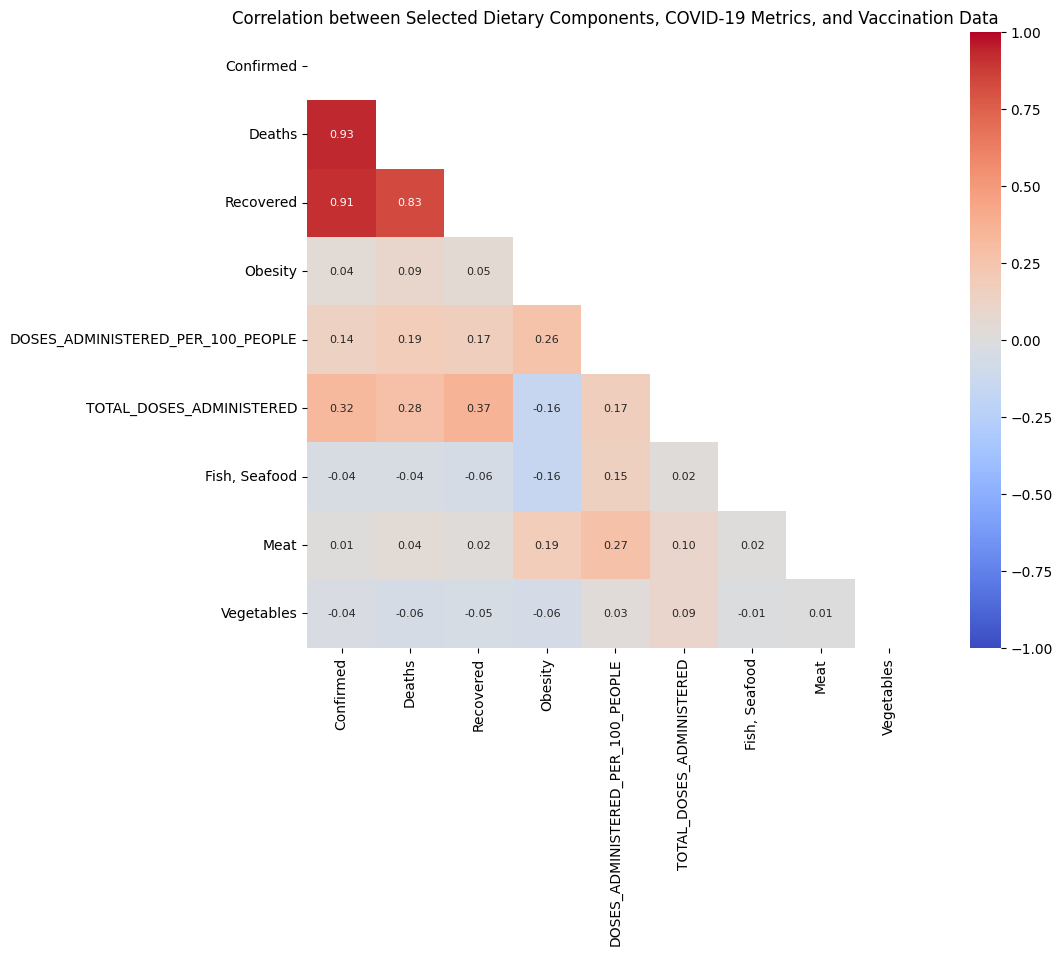

In [37]:
# Selecting key metrics for simplicity
key_metrics = ['Confirmed', 'Deaths', 'Recovered', 'Obesity',
               'DOSES_ADMINISTERED_PER_100_PEOPLE', 'TOTAL_DOSES_ADMINISTERED',
               'Fish, Seafood', 'Meat', 'Vegetables']  # Update this list as needed
corr_data = df_sorted_2[key_metrics].corr()

# Creating a mask for the upper triangle
mask = np.triu(np.ones_like(corr_data, dtype=bool))

# Setting up the matplotlib figure and adjust the figure size
plt.figure(figsize=(12, 8))

# Draws the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_data, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, annot=True, fmt=".2f", annot_kws={"size": 8})

plt.title('Correlation between Selected Dietary Components, COVID-19 Metrics, and Vaccination Data')
plt.show()

**Interpretation:**
The heatmap illustrates a strong positive correlation between confirmed COVID-19 cases and deaths (0.93) and a slightly lower but still strong correlation with recovery (0.91), which is expected as these metrics naturally scale with the spread of the virus. Interestingly, there's a moderate positive correlation between meat consumption and total doses administered (0.27), suggesting countries with higher meat intake may have better vaccination outreach or uptake. Obesity shows a negligible relationship with the COVID-19 metrics and vaccination data, indicating other factors may influence pandemic outcomes more significantly.

#**Fifth Visualization**

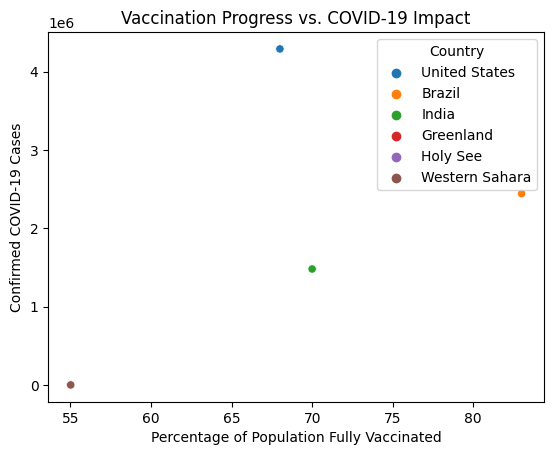

In [38]:
# Creating a scatter plot using Seaborn library, plotting % of population fully vaccinated against confirmed COVID-19 cases.
sns.scatterplot(x='% of population fully vaccinated', y='Confirmed', hue='Country', data=selected_countries, sizes=(50, 200))

# Setting the title of the plot to 'Vaccination Progress vs. COVID-19 Impact'.
plt.title('Vaccination Progress vs. COVID-19 Impact')

# Labeling the x-axis as 'Percentage of Population Fully Vaccinated'.
plt.xlabel('Percentage of Population Fully Vaccinated')

# Labeling the y-axis as 'Confirmed COVID-19 Cases'.
plt.ylabel('Confirmed COVID-19 Cases')

# Displays the plot.
plt.show()



**Interpretation:**
The scatter plot visualizes the relationship between the percentage of the population fully vaccinated against COVID-19 and the number of confirmed cases in select countries. The United States and India, with prominent people, show many cases despite significant vaccination efforts, Brazil's high case count amidst an effective vaccination rate suggests additional factors, potentially including viral variants and population density. Meanwhile, smaller populations like Greenland, the Holy See, and Western Sahara show fewer cases, which could suggest effective vaccination strategies or possibly less travel and exposure. This plot highlights the disparities in pandemic response and its effectiveness across countries with different populations and healthcare capacities. Using a scatter plot here is instrumental in identifying trends and outliers in the data, providing a clear visual representation of the data points for comparative analysis.

#**Sixth Visualization**

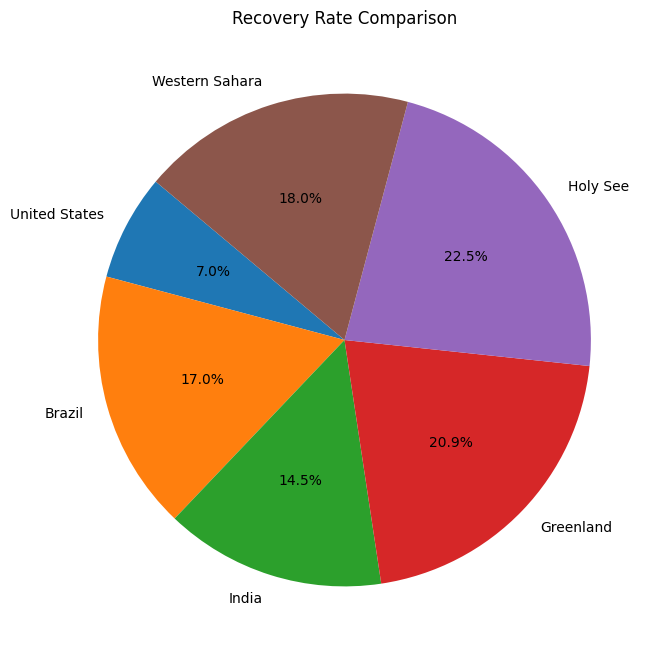

In [39]:
# Concatenate recovery rates from the top and bottom countries into a single Series.
recovery_rates = pd.concat([top_countries['Recovery Rate (%)'], bottom_countries['Recovery Rate (%)']])
# Combines the country names from both top and bottom countries into one list for pie chart labels.
labels = top_countries['Country'].tolist() + bottom_countries['Country'].tolist()

# Initialize a new figure with a specified size for the pie chart.
plt.figure(figsize=(8, 8))
# Creating a pie chart with the recovery rates data, adding percentage labels, and setting the start angle.
plt.pie(recovery_rates, labels=labels, autopct='%1.1f%%', startangle=140)
# Setting the title of the pie chart to 'Recovery Rate Comparison'.
plt.title('Recovery Rate Comparison')
# Display the pie chart.
plt.show()


**Interpretation:**
The pie chart offers a nuanced view of COVID-19 recovery rates across various countries. Brazil holds a significant portion at 17%, underscoring a considerable recovery rate. The Holy See, though smaller in population, shows an impressive recovery rate at 22.5%, the most significant slice of the chart, while the United States represents 7% of the recovery rate distribution. This chart efficiently communicates the relative success of recovery efforts in these countries, suggesting a combination of healthcare efficiency and public health policy effectiveness.

# Summary:

  My project presents an integrated analysis of the COVID-19 pandemic by correlating public health data with nutritional and vaccination information. The rationale behind merging these datasets lies in exploring how lifestyle factors, particularly nutrition and vaccination efforts, interact with the spread and impact of the virus, which is crucial for developing comprehensive public health strategies.

  The COVID-19 dataset lays the groundwork by detailing the spread and mortality of the virus across countries. By merging this with the Healthy Diet dataset, my probe into whether dietary habits might influence health outcomes during the pandemic. It reveals if specific diets are associated with resilience against the virus, an aspect of growing interest in public health.

  The vaccination data adds a critical dimension by enabling us to examine the relationship between immunization rates & the severity of the pandemic's impact. It provides a measure of the effectiveness of the global response and may also indicate whether better-nourished populations respond more effectively to vaccinations.

  This project aligns these diverse yet interrelated datasets to offer insights into the pandemic from a multi-dimensional healthcare perspective. This approach is vital for understanding the complex dynamics of the pandemic and could support evidence-based policy-making in global health.